# Movimento Longitudinal da Motocicleta - Normais, Curvas, Fracionamento da Energia e Fatores de Utilização
## Nota de Estudo

> **Autor:** Fábio Magnani (fabio.magnani@ufpe.br)  
> **Curso:** Engenharia Mecânica - UFPE  
> **Início do desenvolvimento:** 14/10/2025  
> **Primeira publicação:** 20/10/2025  
> **Versão Atual:** v-2025-10-20 (fase de testes das equações e correções das análises; teste técnico no Colab; uso pedagógico com estudantes e início da revisão final de código/texto)



---

O modelo básico usado neste notebook está em Magnani(2025), e a teoria em Magnani(2025a-c).

## Objetivo

Partindo de um modelo básico da moto, acrescentar o cálculo de:   
    - Forças normais,   
    - Forças em curvas,   
    - Fracionamento da potência,   
    - Consumo específico instantâneo,


## Referências

- Magnani, Fábio. “Física Básica das Motos”, 2020a.  
- Magnani, Fábio. “Solução Computacional do Movimento das Motos”, 2020b.  
- Magnani, Fábio. “O Motor da Moto”, 2020c.
- Magnani, Fábio. “Movimento Longitudinal da Motocicleta - Dinâmica Básica”, 2025.

## Principais simplificações

- Eficiência de transmissão 100%
- Rendimento do motor constante

## Estrutura

## Notação básica




## Simulação Dinâmica de Motocicleta

A Fig.1 mostra as forças atuando em uma motocicleta. A propulsão é uma força na direção do movimento, enquanto a frenagem, a resistência aerodinâmica, a resistência à rolagem e a ação da gravidade (no caso de subidas) resistem ao movimento. Para quem tiver mais interesse, o modelo deste *notebook* é introduzido em Magnani (2025) e a teoria completa em Magnani (2025b).

<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-moto-longitudinal-fig-01.png" alt="Balanço de forças na motocicleta" width="600" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 1.</b> Balanço de forças na motocicleta.</figcaption>
</figure>


### Modelo da motocicleta, pista e piloto


Façamos um breve resumo. Aplicando a 2ª Lei de Newton (balanço de forças) na direção do movimento ($x$), chegamos a:

$$
\begin{align}
m \frac{\mathrm{d}V}{\mathrm{d}t}
& =  F_\text{prop} - F_\text{fren,tras} - F_\text{fren,diant} - F_\text{aero} - F_\text{rol} - F_\text{grav,x}
\tag{1} \\
\frac{\mathrm{d}V}{\mathrm{d}t}
&= \alpha \,\frac{ P_{\max}}{m\,V}
- \beta_t\,\mu\, N_{rt}
- \beta_d\,\mu\, N_{rd}
- \frac{1}{2}\rho\, C_{D}\, A_{f}\,\frac{(V-W)^{2}}{m}
- C_{R}\, g \cos\theta
- g \sin\theta
\tag{2}
\end{align}
$$


Onde:

$$
\begin{aligned}
t &: \text{ tempo (s)} \\
x &: \text{ posição (m)} \\
V &: \text{ velocidade (m/s)} \\
a &: \text{ aceleração longitudinal } (a=\mathrm{d}V/\mathrm{d}t) \\
m &: \text{ massa moto+piloto (kg)} \\
P_{\max} &: \text{ potência máxima do motor (W)} \\
\mu &: \text{ coeficiente de atrito pneu–pista} \\
\theta &: \text{ inclinação da pista (rad)} \\
\rho &: \text{ densidade do ar (kg/m}^3\text{)} \\
A_f &: \text{ área frontal (m}^2\text{)} \\
C_R &: \text{ coeficiente de resistência à rolagem} \\
C_D &: \text{ coeficiente de arrasto aerodinâmico} \\
\alpha &: \text{ fração de uso do motor em }[0,1] \\
\beta_t,\ \beta_d &: \text{ frações de uso de atrito traseiro/dianteiro em }[0,1] \\
N_{rt},\ N_{rd} &: \text{ Normais nas rodas traseira e dianteira (N)} \\
W &: \text{ velocidade do vento longitudinal (m/s, sinal no mesmo sentido de $V$)} \\
R_{\text{curva}} &: \text{ raio da curva (m)} \\
k_A &: \text{ parâmetro aerodinâmico } \left(k_A=\tfrac{1}{2}\rho C_D A_f\right)
\end{aligned}
$$

As normais são obtidas fazendo o balanço de forças em $y$ e balanço de momentos em torno do ponto de contato entre o piso e o pneu traseiro, obtendo-se:

$$
\begin{align}
N_{rt} &= m\, g \cos\theta 
\left(1 - \frac{p_{CG}}{p_d}\right)
+ \frac{m\, a\, h_{CG} + k_A (V - W)^2 h_{CP} + m\, g \sin\theta \, h_{CG}}{p_d} \tag{3}
\\
N_{rd} &= m\, g \cos\theta \,\frac{p_{CG}}{p_d}
- \frac{m\, a\, h_{CG} + k_A (V - W)^2 h_{CP} + m\, g \sin\theta \, h_{CG}}{p_d}  \tag{4}
\end{align}
$$

Notamos, nos primeiros termos à direita nas equações acima, que a força do peso na direção $y$ (*i.e.*, $mg\cos\theta$) é divida entre as duas rodas em função da posição do centro de gravidade (*i.e.*, $p_{CG}/p_d$). Os segundos termos à direita, que têm o mesmo valor com sinal trocado, são a transferência de peso. Quer dizer a aceleração positiva, a resistência aerodinâmica e o aclive transferem o peso para a roda traseira; já a desaceleração e o declive transferem o peso para a roda dianteira.


### Caso Base: parâmetros da motocicleta, pista e piloto

Na tabela abaixo, temos os valores que usaremos no Caso Base do nosso estudo, bem como uma faixa aproximada dos valores que podemos encontrar na prática. 

| Símbolo | Valor base | Unidade | Faixa típica / Observação | Comentário sobre a escolha |
|---|---:|---|---|---|
| $α$  | 1.0 | – | 0–1 | Uso pleno do motor no caso-base |
| $β_t$  | 0 | – | 0–1 | Sem frenagem traseira no trecho de aceleração |
| $β_d$  | 0 | – | 0–1 | Sem frenagem dianteira no trecho de aceleração |
| $m$ | 250 | kg | 180–300 | Moto+piloto+carga |
| $μ$ | 0.8 | – | 0.6–1.0 | Aderência alta (asfalto seco) |
| $g$ | 9.81 | m/s² | 9.79–9.83 | Padrão SI |
| $θ$  | 0 | rad | −0.15 a 0.15 | Trecho plano |
| $ρ$ | 1.225 | kg/m³ | 1.1–1.3 | Nível do mar, 0–30 °C |
| $C_D$ | 0.7 | – | 0.6–0.9 | Piloto ereto; moto não carenada |
| $A_f$ | 0.7 | m² | 0.6–0.8 | Área frontal típica |
| $C_R$ | 0.02 | – | 0.01–0.03 | Pneus em asfalto | 
| $V_{0}$ | 0.01 | m/s | 0.01–0.5 | Evita singularidade em $P_{\max}/(mV)$ |
| $t_{0}$ | 0 | s | – | Início da simulação |
| $t_f$ | 30 | s | 10–60 | Janela para atingir regime |
| $h_{CG}$ | 0.72 | m | 0.6–0.8 | Altura do CG |
| $h_{CP}$ | 0.95 | m | 0.8–1.1 | Altura do centro de pressão |
| $p_d$ | 1.40 | m | 1.3–1.5 | Distância entre eixos |
| $p_{CG}$ | 0.67 | m | 0.6–0.8 | Distância do CG ao eixo traseiro (ligeiramente atrás do centro) |
| $W$ | 0 | m/s | −10 a 10 | Vento longitudinal (caso-base: calmo) |
| $R_{\text{curva}}$ | 1e10 | m | 30–300 | No caso base, estamos usando R=$ \infty $, *i.e.*, uma reta  |




### Modelo do motor

Usando um modelo simples que relaciona a potência com parâmetros básicos do motor, temos:

$$
P_{\text{max}}(\omega) =
\begin{cases}
\eta_m \, \eta_{vol,nom} \, \omega \, T_{ref}, & \omega < \omega_{red}\\[4pt]
0, & \omega \ge \omega_{red}  
\end{cases}
\tag{5}
$$

com

$$
\begin{aligned}
T_{ref} & = \dfrac{1}{4\pi} \mathbb{V}_{desl}\!\left(\dfrac{p_{a}}{R\,T_a}\right)
\dfrac{\sigma PC_{comb} M_{comb}}{\sigma+\lambda\,\gamma}, \qquad
\gamma = x+\dfrac{y}{4}-\dfrac{z}{2}, \qquad
M_{comb} = x\,M_C + y\,M_H + z\,M_O .
\end{aligned} \tag{6}
$$

A faixa de rotação do motor é menor do que a faixa necessária para a roda da motocicleta. Para isso, precisamos das marchas, que permitem mudar a relação entre a rotação do motor e da roda. A relação total de transmissão é: 

$$
r_{\text{total,i}} = r_{\text{primaria}} r_{\text{final}} r_{\text{marcha,i}}  \tag{7}
$$

Onde $r_{\text{primaria}}$ é a relação das engrenagens entre o virabrequim e o eixo de entrada na caixa de marchas, $r_{\text{final}}$ é a relação do número de dentes entre o pinhão e a coroa da motocicleta, e $r_{\text{marcha,i}}$ (variável) são as várias relações entre os pares de engrenagens dentro da caixa de marcha. $r_{\text{primaria}}$ é um dado de projeto, $r_{\text{final}}$ pode ser modificada trocando o pinhão ou a coroa, e $r_{\text{marcha,i}}$ é alterada pela piloto durante a operação da motocicleta (dentro das opções existentes na caixa de marchas). Temos, então,  a seguinte relação entre a velocidade e a rotação do motor:

$$
\omega = r_{\text{total,i}} \frac{V}{R_{\text{rod}}} =  r_{\text{primaria}} r_{\text{final}} r_{\text{marcha,i}} \frac{V}{R_{\text{rod}}}  \tag{8}
$$


Unindo todas as equações, obtemos:


$$
P_{\text{max}}(\omega) =
\begin{cases}
 \eta_m \eta_{vol,nom} \dfrac{\omega}{4\pi} \mathbb{V}_{desl} \underbrace{  \!\left(\dfrac{p_{a}}{R\,T_a}\right)}_{\text{atmosfera}}
&\underbrace{\dfrac{\sigma\,PC_{comb} (x\,M_C + y\,M_H + z\,M_O)}{\sigma+\lambda\ (x+y/4-z/2)}}_{\text{combustível}}&, \omega \le \omega_{red}\\[4pt]
&0 &,  \omega > \omega_{red}
\end{cases}
\tag{9}
$$

Ou

$$
P_{\text{roda}}(\omega,\alpha) = \alpha P_{\text{max}}(\omega) =
\begin{cases}
 \alpha \eta_m \eta_{vol,nom} \dfrac{\omega}{4\pi} \mathbb{V}_{desl} \underbrace{  \!\left(\dfrac{p_{a}}{R\,T_a}\right)}_{\text{atmosfera}}
&\underbrace{\dfrac{\sigma\,PC_{comb} (x\,M_C + y\,M_H + z\,M_O)}{\sigma+\lambda\ (x+y/4-z/2)}}_{\text{combustível}}&, \omega \le \omega_{red}\\[4pt]
&0 &,  \omega > \omega_{red}
\end{cases}
\tag{10}
$$


Pela equação acima, vemos que a potência máxima disponível na roda depende da eficiência volumétrica (*i.e.*, geometria da admissão e do escape, configuração do sistema de abertura e fechamento das válvulas), do rendimento térmico do motor (*i.e.*, sua capacidade de transformar energia química em energia mecânica), do tamanho do motor (*i.e.*, a cilindrada do motor), das condições do ar ambiente e das características do combustível (tanto da sua energia específica quanto da sua estequiometria, pois um combustível pode ter menos energia por kg mas permitir uma maior quantidade de combustível para a mesma quantidade de ar, como é o caso do álcool em relação à gasolina);


$$
F_{\text{prop}}(\alpha,i) = \frac{P_{\text{roda}}}{V} = 
\begin{cases}
 \alpha \eta_m \eta_{vol,nom}\mathbb{V}_{desl} \underbrace{\dfrac{r_{\text{total,i}}}{4\pi R_{\text{rod}}}}_{\text{transmissão}}  \underbrace{  \!\left(\dfrac{p_{a}}{R\,T_a}\right)}_{\text{atmosfera}}
&\underbrace{\dfrac{\sigma\,PC_{comb} (x\,M_C + y\,M_H + z\,M_O)}{\sigma+\lambda\ (x+y/4-z/2)}}_{\text{combustível}}&, V \le \omega_{\text{red}}R_{\text{rod}}/r_{\text{total,i}} \\[4pt]
&0 &,  V > \omega_{\text{red}}R_{\text{rod}}/r_{\text{total,i}}
\end{cases}
\tag{11}
$$

Podemos notar que o modelo representa bem o comportamento qualitativo do motor, no qual a força de propulsão depende da escolha do piloto, abrindo a borboleta (*i.e.*, aumentando $\alpha$) ou baixando a marcha (*i.e.*, aumentando $r_{\text{total,i}}$ - desde que a rotação não atinja o limite superior de corte do motor).


### Caso Base: parâmetros do motor

#### **1. Parâmetros atmosféricos**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|---|---|---|
| $p_a$ | Pressão absoluta do ar | 101 325 | Pa | 1 atm | Condição padrão ao nível do mar |
| $T_a$ | Temperatura do ar | 293.15 | K | 20 °C | Condição ambiente média |
| $R$ | Constante universal dos gases | 8.314 × 10⁰ | J/(mol·K) | – | Valor universal |


#### **2. Parâmetros do motor**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|---|---|---|
| $\mathbb{V}_{desl}$ | Volume deslocado total (cilindrada) | 3.00 × 10⁻⁴ | m³ | 300 cm³ | Moto de média cilindrada |
| $\eta_{vol,nom}$ | Eficiência volumétrica | 0.90 | – | 90 % | Moto aspirada em regime médio |
| $\eta_m$ | Rendimento térmico (comb->roda) | 0.30 | – | 30 % | Inclui perdas mecânicas e térmicas |
| $\omega_{red}$ | Rotação limite (*redline*) | 995 rad/s | rad/s | 9 500 rpm | A partir daqui a potência é anulada no modelo |
| $P_{\text{max}}$ | Potência máxima na roda | *calculada* | W | kW ou hp | Via Eq. (9) |

Atenção, existe uma relação muito forte entre a eficiência volumétrica no modelo do motor ($\eta_{\text{vol}}$) e a posição do acelerador no modelo da motocicleta ($\alpha$), já que a eficiência volumétrica depende tanto do projeto do motor quanto da posição da borboleta. Não iremos discutir essa questão neste *notebook*. Na prática, iremos considerar essas contribuições em duas partes, $\eta_{vol,nom}$ representando o papel do projeto da admissão, escape e válvulas; e $\alpha$ representando a posição da borboleta.

#### **3. Parâmetros do combustível (gasolina ≈ C₈H₁₈)**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|---|---|---|
| $x, y, z$ | Coeficientes estequiométricos (CₓH_yO_z) | 8, 18, 0 | – | – | Combustível genérico tipo gasolina |
| $M_C$ | Massa molar do carbono | 12.011 × 10⁻³ | kg/mol | 12.011 g/mol | – |
| $M_H$ | Massa molar do hidrogênio | 1.008 × 10⁻³ | kg/mol | 1.008 g/mol | – |
| $M_O$ | Massa molar do oxigênio | 15.999 × 10⁻³ | kg/mol | 15.999 g/mol | – |
| $M_{comb}$ | Massa molar da molécula de combustível | 0.11423 | kg/mol | 114.23 g/mol | Para C₈H₁₈ |
| $PC_{comb}$ | Poder calorífico inferior | 44.8 × 10⁶ | J/kg | 44.8 MJ/kg | Gasolina comercial |
| $\rho_{comb}$ | Densidade do combustível | 0.74 | kg/litro | 0.74 kg/litro | Gasolina comercial |
| $\gamma$ | Termo auxiliar ($x + y/4 - z/2$) | 12.5 | – | – | Determina a proporção teórica de O₂ em relação ao combustível|
| $\sigma$ | Fração molar de O₂ no ar | 0.21 | – | 21 % | Atmosfera padrão |
| $\lambda$ | Fator de excesso de ar (razão ar/comb. real ÷ teórica) | 1.0 | – | – | Mistura estequiométrica |



####  **4. Parâmetros da transmissão**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|:---|:---|:---|
| $R_{\text{rod}}$ | Raio efetivo da roda traseira | 0.30 | m | 300 mm | Raio dinâmico roda+pneu |
| $r_{\text{prim}}$ | Relação primária | 2.40 | – | – | Virabrequim → eixo de entrada |
| $r_{\text{marcha}}$ | Relações (1ª→5ª) | [2.50, 1.80, 1.40, 1.20, 1.00] | – | – | **Faixas típicas**: 1ª 2.2–2.8 (saída do zero); 2ª 1.6–2.1; 3ª 1.3–1.6; 4ª 1.1–1.3; 5ª 0.9–1.1 (muitas motos têm “overdrive” < 1). |
| $r_{\text{final}}$ | Relação final | 2.60 | – | – | Ex.: 3.20 “curta” (acelera melhor) vs 2.60 “longa” (Vmáx maior). |
| $r_{\text{tot}}$ | $r_{\text{prim}}\cdot r_{\text{marcha}}\cdot r_{\text{final}}$ | – | – | – | Multiplica torque/rotação entre motor e roda. |




### Curva: forças laterais, resultantes de atrito e fatores de uso

O atrito da roda é usado para acelerar ($F_{\text{prop}}$), frear ($F_{\text{fren}}$) e para fazer curvas. Então, para saber se estamos dentro do limite, precisamos calcular a força centrípeta.


<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-moto-longitudinal-fig-02.png" alt="Balanço de forças na motocicleta" width="1200" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 2.</b> Balanço de forças na motocicleta durante as curvas.</figcaption>
</figure>


Sabemos que a força centrípeta para fazer a curva é dada pela equação:


$$
F_{\text{cen}}=\frac{m\,V^2}{R_{\text{curva}}} \tag{12}
$$

Vamos distribuir essa força entre as rodas traseira e dianteira usando a distância do centro de gravidade a cada uma delas:


$$
\begin{align}
F_{\text{cen,d}}=\frac{m\,V^2}{R_{\text{curva}}}&\left(\frac{p_{CG}}{p_d}\right)
\tag{13}  \\
F_{\text{cen,t}}=\frac{m\,V^2}{R_{\text{curva}}}&\left(1-\frac{p_{CG}}{p_d}\right)
\tag{14}
\end{align}
$$

A força de atrito usada em cada roda é a resultante entre as forças longitudinais (propulsão ou frenagem) e transversais (centrípeta):


$$
\begin{align}
\bigl|F_{\text{at,d}}\bigr| &= \sqrt{F_{\text{frn,d}}^{\,2}+F_{\text{cen,d}}^{\,2}} \tag{15} \\
\bigl|F_{\text{at,t}}\bigr| &= \sqrt{(F_{\text{pro}}+F_{\text{frn,t}})^{2}+F_{\text{cen,t}}^{\,2}} \tag{16}
\end{align}
$$

Finalmente, temos que a força de atrito disponível em cada roda é dada pelo coeficiente de atrito vezes a normal (vamos considerar que a roda nunca trava, o que nos obrigaria a usar o coeficiente de atrito dinâmico ao invés do estático):

$$
\begin{align}
\bigl|F_{\text{disp,d}}\bigr|=\mu\,N_{rd} \tag{17} \\
\bigl|F_{\text{disp,t}}\bigr|=\mu\,N_{rt} \tag{18}
\end{align}
$$

### Margens de uso

Para facilitar a nossa visualização dos resultados (*i.e.*, se a moto passou dos limites do modelo), vamos definir a margem de uso ($\epsilon$). Colocando de forma simples, se $\epsilon<0$ então o resultado do modelo não é mais físico. Em outro *notebook*, usaremos o $\epsilon$ como variável de controle, quer dizer, o piloto irá mudar o seu comportamento ($\alpha$ ou $\beta$) para prevenir que a moto saia de seus limites (*i.e.*, empine uma das rodas, patine ou trave as rodas, ou saia nas curvas).


- **Margem de aderência** (quanto falta para saturar o atrito em cada roda):
$$
\epsilon_{\text{ad,d}} = 1-\frac{\bigl|F_{\text{at,d}}\bigr|}{\bigl|F_{\text{disp,d}}\bigr|} \tag{19}
$$

$$
\epsilon_{\text{ad,t}} = 1-\frac{\bigl|F_{\text{at,t}}\bigr|}{\bigl|F_{\text{disp,t}}\bigr|} \tag{20}
$$

- **Margem da normal** (quanto falta para a roda perder o contato com o chão)>

$$
\epsilon_{\text{no,d}}=\frac{N_{rd}}{N_{\text{est,d}}} \tag{21}
$$

$$
\epsilon_{\text{no,t}}=\frac{N_{rt}}{N_{\text{est,t}}} \tag{22}
$$


Onde definimos as normais estáticas puras (*i.e.*, as estáticas caso a moto estivesse parada, sem transferência de peso) como:


$$
N_{\text{est,d}}=m\,g\cos\theta\,\dfrac{p_{CG}}{p_d} \tag{23}
$$

$$
N_{\text{est,t}}=m\,g\cos\theta\,\left(1-\dfrac{p_{CG}}{p_d}\right) \tag{24}
$$




### Potências instantâneas e consumo

Finalmente, vamos calcular as potências instantâneas e o consumo da motocicleta. Lembrando das forças:

$$
\begin{align}
F_{\text{pro}}&=\frac{P_{\text{roda}}(\omega)}{V} \tag{25} \\
F_{\text{fren}}&=F_{\text{fren,d}}+F_{\text{fren,t}} \tag{26} \\
F_{\text{aer}}&=\tfrac12\,\rho\,C_D\,A_f\,(V-W)^2 \tag{27} \\
F_{\text{rol}}&=C_R\,m\,g\cos\theta \tag{28} \\
F_{\text{grav}}&=m\,g\sin\theta \tag{29} 
\end{align}
$$

Como $P = F \cdot V$, obtemos:


$$
\begin{align}
P_{\text{iner}}&=m V \frac{\mathrm d V}{\mathrm d t} \tag{30} \\
P_{\text{pro}}&= P_{\text{roda}} \tag{31} \\
P_{\text{fren}}&=V(F_{\text{fren,d}}+F_{\text{fren,t}}) \tag{32} \\
P_{\text{aer}}&=\tfrac12\,\rho\,C_D\,A_f\,V(V-W)^2 \tag{33} \\
P_{\text{rol}}&=C_R m g  V \cos\theta \tag{34} \\
P_{\text{grav}}&=m V g \sin\theta \tag{35} 
\end{align}
$$

Fazendo o balanço, para o caso sem frenagem:

$$
P_{\text{roda}} =  P_{\text{iner}} + P_{\text{aer}} + P_{\text{rol}} + P_{\text{grav}} \tag{36}
$$

E, para o caso de frenagem sem o uso do motor:


$$
P_{\text{fren}} =  -P_{\text{iner}} - P_{\text{aer}} - P_{\text{rol}} - P_{\text{grav}} \tag{37}
$$

O consumo instantâneo da motocicleta é dado por quantos quilometros ela se desloca por cada litro de combustível consumido. A potência do combustível é calculada a partir da potência na roda e o rendimento total do motor/motocicleta:

$$
  P_{\text{comb}}=\frac{P_{\text{roda}}}{\eta_{\text{m}}} \tag{38}
$$

O consumo mássico de combustível é dado por:

$$
 \dot m_{\text{comb}}=\frac{P_{\text{comb}}}{PC_{\text{comb}}}
=\frac{P_{\text{roda}}}{\eta_{\text{m}}\,PC_{\text{comb}}}  \tag{39}
$$


O consumo em litros por segundo é:

$$
  \dot V_{\text{comb}}=\frac{\dot m_{\text{comb}}}{\rho_{\text{comb}}}
=\frac{P_{\text{motor}}}{\eta_{\text{m}}\,PC_{\text{comb}}\,\rho_{\text{comb}}} \tag{40}
$$

Finalmente, o consumo instantâneo da motocicleta

$$\mathcal{C}_{\text{inst}}[\text{km/litro}]
=\frac{V}{1000\,\dot V_{\text{comb}}}
=\frac{\eta_{\text{m}}\,PC_{\text{comb}}\,\rho_{\text{comb}}}{1000}
\frac{V}{P_{\text{roda}}} \tag{41}
$$

Ou, no caso sem frenagem:

$$\mathcal{C}_{\text{inst}}
=\frac{\eta_{\text{m}}\,PC_{\text{comb}}\,\rho_{\text{comb}}}{1000 m \left( \frac{\mathrm d V}{\mathrm d t} + \frac{1}{2m} \rho\,C_D\,A_f\,(V-W)^2 + C_R g \cos\theta + g \sin\theta\right)}
\frac{}{} \tag{42}
$$

De onde se vê claramente o papel dos vaários parâmetros no consumo: rendimento do motor (carros veículos elétricos consomem menos energia), poder calorífico (veículos a gasolina consomem menos combustível que veículos a álcool), massa (motos consomem menos que carros), inclinação da pista (na subida o consumo é maior que nas descidas) e eficiência do veículo (carros com melhor aerodinâmica e menor resistência à rolagem consomem menos).


Substituindo a Eq.2 e a Eq.11 na Eq. 42, obtemos:

$$\mathcal{C}_{\text{inst}}
=\frac{\eta_{\text{m}}\,PC_{\text{comb}}\,\rho_{\text{comb}}}{1000 m \alpha \eta_m \eta_{vol,nom}\mathbb{V}_{desl} \dfrac{r_{\text{total,i}}}{4\pi R_{\text{rod}}}   \!\left(\dfrac{p_{a}}{R\,T_a}\right)
\dfrac{\sigma\,PC_{comb} (x\,M_C + y\,M_H + z\,M_O)}{\sigma+\lambda\ (x+y/4-z/2)}}
\frac{}{} \tag{43}
$$

Na qual se vê que o consumo instantâneo não vai ser função da velocidade, o que não é realista. Isso está acontecendo porque
escolhemos um modelo de motor simplificado, no qual a eficiência volumétrica e o rendimento do motor não variam com
a rotação.

## Seleção de marchas

Precisamos agora de uma estratégia para a troca de marchas. No mundo real, o piloto pode escolher uma entre várias marchas, para privilegiar maior potência ou menor consumo, vibração ou ruído. No Caso Base, o piloto irá escolher a marcha que entregue a maior potência máxima (para o nosso modelo simples, isso significa maior rotação).

Em primeiro lugar, determinamos quais marchas ele pode escolher (*i.e.*, quais marchas não provocam uma rotação maior que $\omega_{\text{red}}$). Uma marcha é **válida** em $V$ se não estoura o *redline*:

$$
\mathcal{S}(V) \;=\; \left\{\, i \;\big|\; \omega_i(V) \;<\; \omega_{\text{red}} \,\right\}.
$$

Casos:
- Se $\mathcal{S}(V)=\varnothing$ (vazio), então nenhuma marcha atende ao redline nessa $V$ (atingiu a $V_{\max}$ do conjunto de marchas) e a propulsão é tomada como nula.
- Se $\mathcal{S}(V)\neq\varnothing$, há ao menos uma marcha disponível.


Entre as marchas válidas em $V$, escolheremos aquela que fornece a maior rotação



V_final = 37.91 m/s  (136.5 km/h)


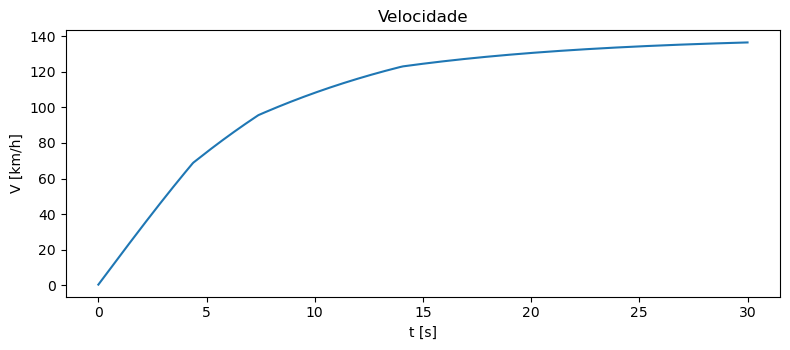

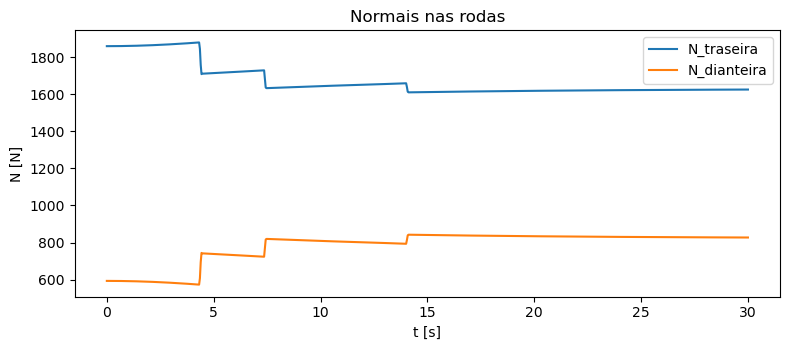

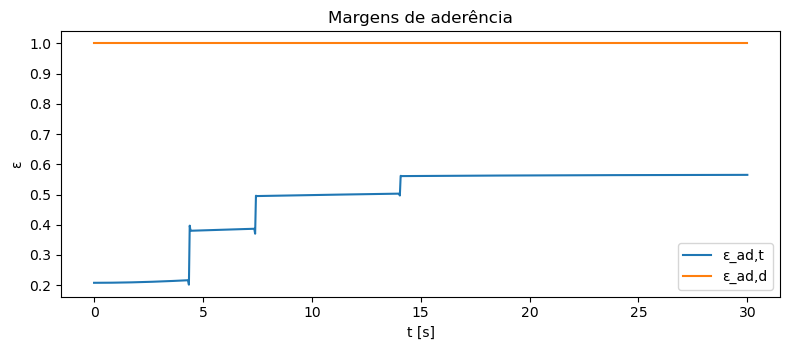

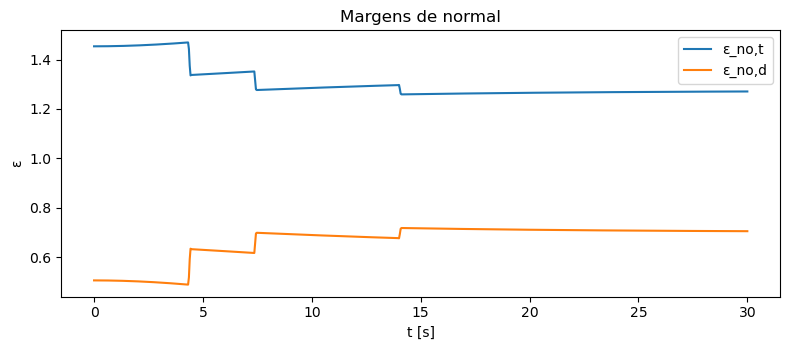

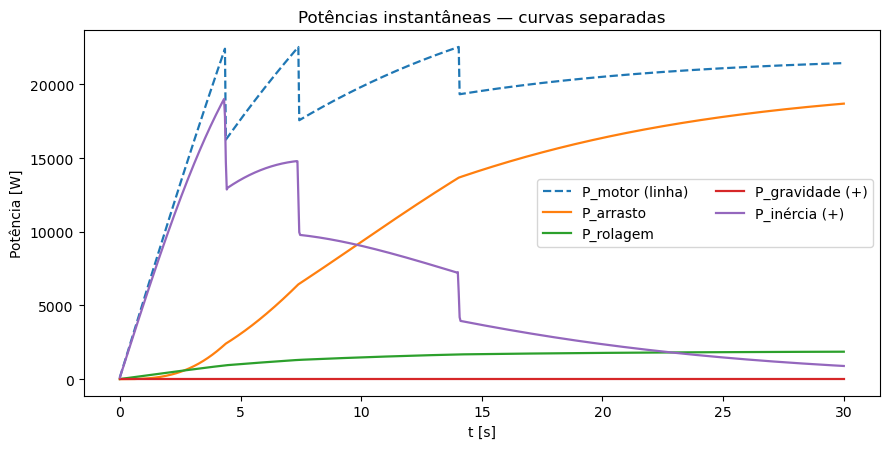

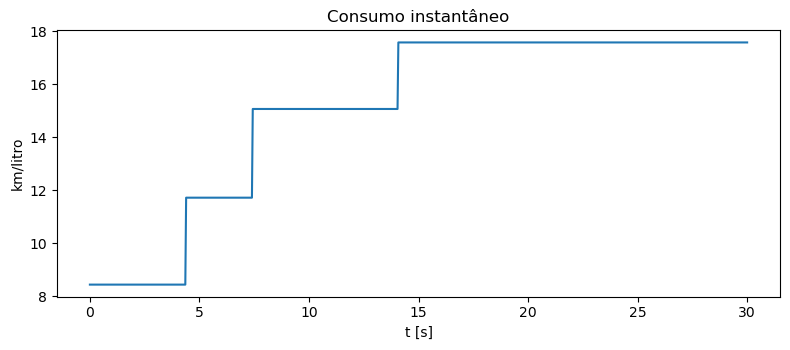

In [32]:
# ============================================================
# Simulação + Pós-processamento em UMA execução
# - dV/dt genérico (mu, beta_t, beta_d, normais)
# - motor P(ω) com redline e seleção automática de marcha
# - curvas separadas de potência (sem empilhar) + autonomia
# ============================================================

import numpy as np                              # NumPy para vetores/matrizes
from scipy.integrate import solve_ivp           # solve_ivp: integrador de EDO
import matplotlib.pyplot as plt                 # Matplotlib para gráficos

# ------------------------------
# 1) Parâmetros do veículo/ambiente
# ------------------------------
m      = 250.0      # kg   | massa total (moto + piloto)
g      = 9.81       # m/s² | aceleração da gravidade
theta  = 0.0        # rad  | inclinação da pista (0 = plano)
rho    = 1.225      # kg/m³| densidade do ar (nível do mar)
C_D    = 0.70       # -    | coeficiente de arrasto aerodinâmico
A_f    = 0.80       # m²   | área frontal efetiva
C_R    = 0.020      # -    | coeficiente de resistência à rolagem
alpha  = 1.0        # -    | fração de uso do motor (0 a 1)
mu     = 0.80       # -    | coeficiente de atrito pneu-pista
beta_t = 0.0        # -    | fração do atrito disponível usada na traseira (frenagem)
beta_d = 0.0        # -    | fração do atrito disponível usada na dianteira (frenagem)
R_rod  = 0.30       # m    | raio efetivo da roda traseira
W      = 0          # m/s  | velocidade do vento
V_eps  = 1e-2       # m/s  | epsilon para evitar divisão por zero em P/V
k_A    = 1/2 * rho * C_D * A_f  # N·s²/m⁴ | parâmetro aerodinâmico (½ ρ C_D A_f)

# Geometria (CG = centro de gravidade; CP = centro de pressão)
h_CG, h_CP = 0.72, 0.95   # m | alturas do CG e do CP
p_d, p_CG  = 1.40, 0.67   # m | entre-eixos total e distância CG→eixo traseiro

# Curvatura (R_curva muito grande ≈ movimento retilíneo)
R_curva = 1.0e10  # m

# Tempo de simulação
t0, tf = 0.0, 30.0                       # s | intervalo de integração
t_eval = np.linspace(t0, tf, 800)        # pontos de avaliação para saída suave

# ------------------------------
# 2) Transmissão (um caso)
# ------------------------------
r_primary = 2.40                                        # - | relação primária
r_gears   = np.array([2.50, 1.80, 1.40, 1.20, 1.00])    # - | 1ª..5ª marchas
r_final   = 2.60                                        # - | relação final
r_totals  = r_primary * r_final * r_gears               # - | relações totais por marcha

# ------------------------------
# 3) Modelo de potência do motor P(ω)
# ------------------------------
V_desl = 300e-6          # m³   | cilindrada total
p_a    = 101325.0        # Pa   | pressão do ar
T_a    = 293.15          # K    | temperatura do ar
eta_vol = 0.90           # -    | eficiência volumétrica
eta_m   = 0.30           # -    | rendimento mecânico global
sigma   = 0.21           # -    | fração molar de O2 no ar
lam     = 1.0            # -    | fator de excesso de ar (estequiométrico)
R       = 8.314462618    # J/mol/K | constante universal dos gases

# Combustível ~ C8H18 (gasolina)
x, y, z = 8, 18, 0                               # - | estequiometria
PC_comb = 44.8e6                                 # J/kg | PCI
M_C, M_H, M_O = 12.011e-3, 1.008e-3, 15.999e-3   # kg/mol | massas molares
M_comb = x*M_C + y*M_H + z*M_O                   # kg/mol | massa molar do combustível
rho_comb = 0.74                                  # kg/L | densidade gasolina

rpm_redline = 9500.0                             # rpm   | redline
w_redline   = rpm_redline * 2*np.pi/60.0         # rad/s | redline em rad/s

# ------------------------------
# MODELO DO MOTOR EM FUNÇÃO DA ROTAÇÃO
# ------------------------------
def pmotor(omega):
    """Retorna P_motor(ω) [W] com corte no redline (ω escalar ou array)."""
    gamma = x + y/4 - z/2                                                # termo auxiliar
    T_ref = (1/(4*np.pi)) * V_desl * (p_a/(R*T_a)) * (sigma*PC_comb*M_comb) / (sigma + lam*gamma)
    w = np.asarray(omega, float)                                         # garante array NumPy
    w_eff = np.where(w < w_redline, w, 0.0)                              # zera acima do redline
    return eta_m * eta_vol * w_eff * T_ref                               # W

# ------------------------------
#MODELO DO MOTOR EM FUNÇÃO DA VELOCIDADE (AQUI ESTÁ A ESTRATÉGIA DE MUDANÇA DE MARCHA)
# ------------------------------
def power_from_speed(V):
    """Seleciona a marcha com maior ω < redline e retorna P_motor(V)."""
    omegas = r_totals * (V / R_rod)        # rad/s | ω por marcha na velocidade V
    valid = np.where(omegas < w_redline)[0]# marchas válidas (não estouram redline)
    if valid.size == 0:                    # acima da Vmáx da 5ª marcha
        return 0.0
    k = valid[np.argmax(omegas[valid])]    # marcha que dá ω válido mais alto
    return pmotor(omegas[k])               # potência disponível nessa marcha

# Versão vetorizada para pós-processamento
power_from_speed_vec = np.vectorize(power_from_speed)

# ------------------------------
# MODELO DA MOTOCICLETA
# ------------------------------
def dVdt(t, y):
    V = max(y[0], 0.0)                         # impõe V ≥ 0
    Veff = V if V > V_eps else V_eps           # evita divisão por zero em P/V

    # Propulsão disponível
    P_av  = power_from_speed(V)                # W | potência do motor para V
    F_prop = alpha * P_av / Veff               # N | força propulsiva efetiva

    # Normais aproximadas (sem termo inercial m*a*h_CG no ODE para simplicidade)
    N_rt = m*g*np.cos(theta)*(1 - p_CG/p_d) + (k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d
    N_rd = m*g*np.cos(theta)*(p_CG/p_d)     - (k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d

    # Frenagem longitudinal (se beta_* > 0): limita pela disponibilidade de atrito
    F_fren = beta_t*mu*N_rt + beta_d*mu*N_rd   # N | soma das contribuições

    # Resistências
    F_aer  = 0.5 * rho * C_D * A_f * (V-W)**2       # N | arrasto
    F_rol  = C_R * m * g * np.cos(theta)       # N | rolagem (aprox. constante)
    F_grav = m * g * np.sin(theta)             # N | gravidade (rampa)

    # dV/dt = (Σ forças) / m
    return [(F_prop - F_aer - F_rol - F_grav - F_fren) / m]

# ------------------------------
# SOLUÇÃO DA EQUAÇÃO DIFERENCIAL
# ------------------------------
V0 = 0.1  # m/s | velocidade inicial (quase parado)
sol = solve_ivp(dVdt, (t0, tf), [V0], t_eval=t_eval, max_step=0.05)  # integra EDO
V = sol.y[0]; t = sol.t                                              # extrai V(t) e malha t
print(f"V_final = {V[-1]:.2f} m/s  ({3.6*V[-1]:.1f} km/h)")          # diagnóstico rápido

# ------------------------------
# PÓS-PROCESSAMENTO
# ------------------------------
# Rotação e potência realmente usadas ao longo do tempo (com seleção de marcha)
omegas_all = np.outer(r_totals, V / R_rod)                                      # ω por marcha × tempo
valid_mask = omegas_all < w_redline                                             # máscara de validade
idx = np.argmax(np.where(valid_mask, omegas_all, -np.inf), axis=0)              # marcha escolhida
omega_sel = omegas_all[idx, np.arange(omegas_all.shape[1])]                     # ω selecionada
P_motor = alpha * pmotor(omega_sel)                                             # W | potência efetiva

# Forças longitudinais instantâneas
F_prop = P_motor / np.maximum(V, V_eps)                                         # N | propulsão
F_aer  = 0.5 * rho * C_D * A_f * (V-W)**2                                           # N | arrasto
F_rol  = C_R * m * g * np.cos(theta)                                            # N | rolagem
F_grav = m * g * np.sin(theta)                                                  # N | gravidade

# Normais REFINADAS (agora com termo inercial m*a*h_CG)
a = np.gradient(V, t, edge_order=2)                                             # m/s² | aceleração
N_rt = m*g*np.cos(theta)*(1 - p_CG/p_d) + (m*a*h_CG + k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d
N_rd = m*g*np.cos(theta)*(p_CG/p_d)     - (m*a*h_CG + k_A*(V - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d

# Frenagem efetiva (no caso base, beta_* = 0 → zero)
F_fren = beta_t*mu*N_rt + beta_d*mu*N_rd                                        # N

# Curva (se quiser avaliar margens laterais; aqui R_curva enorme → ~0)
F_cen_d = m*V**2/R_curva*(p_CG/p_d)                                             # N | demanda lateral dianteira
F_cen_t = m*V**2/R_curva*(1 - p_CG/p_d)                                         # N | demanda lateral traseira

# Resultantes de atrito e capacidades disponíveis
F_fat_d = np.sqrt((0.0)**2 + F_cen_d**2)                                        # N | dianteira (sem tração)
F_fat_t = np.sqrt((F_prop - F_fren)**2 + F_cen_t**2)                             # N | traseira
F_disp_d = mu * N_rd                                                             # N | capacidade dianteira
F_disp_t = mu * N_rt                                                             # N | capacidade traseira

# Margens (ε): >0 folga; <0 excedeu
eps_ad_d = 1 - np.abs(F_fat_d)/np.maximum(np.abs(F_disp_d), 1e-9)                # aderência dianteira
eps_ad_t = 1 - np.abs(F_fat_t)/np.maximum(np.abs(F_disp_t), 1e-9)                # aderência traseira
N_est_d = m*g*np.cos(theta)*(p_CG/p_d)                                           # N | normal estática dianteira
N_est_t = m*g*np.cos(theta)*(1 - p_CG/p_d)                                       # N | normal estática traseira
eps_no_d = N_rd/np.maximum(N_est_d, 1e-9)                                   # margem de normal dianteira
eps_no_t = N_rt/np.maximum(N_est_t, 1e-9)                                    # margem de normal traseira

# Potências (curvas separadas; positivas indicam demanda)
P_iner = m * V * a                                                               # W | inércia (pode ser ±)
P_aer  = F_aer * V                                                               # W | arrasto
P_rol  = F_rol * V                                                               # W | rolagem
P_grav = F_grav * V                                                              # W | gravidade (±)
P_fren = F_fren * V                                                              # W | frenagem (+ se ativa)
P_iner_pos = np.maximum(P_iner, 0.0)                                             # W | parte positiva (demanda)
P_grav_pos = np.maximum(P_grav, 0.0)                                             # W | parte positiva (subida)

# Consumo instantâneo (km/litro) 
C_inst   = (eta_m * PC_comb * rho_comb / 1000.0) * V / np.maximum(P_motor, 1.0)# km/L | consumo instantâneo

# ------------------------------
# GRÁFICOS
# ------------------------------
# Velocidade
plt.figure(figsize=(8,3.6))
plt.plot(t, V*3.6)
plt.xlabel('t [s]'); plt.ylabel('V [km/h]'); plt.title('Velocidade')
plt.tight_layout(); plt.show()

# Normais
plt.figure(figsize=(8,3.6))
plt.plot(t, N_rt, label='N_traseira')
plt.plot(t, N_rd, label='N_dianteira')
plt.xlabel('t [s]'); plt.ylabel('N [N]'); plt.title('Normais nas rodas'); plt.legend()
plt.tight_layout(); plt.show()

# Margens de aderência
plt.figure(figsize=(8,3.6))
plt.plot(t, eps_ad_t, label='ε_ad,t')
plt.plot(t, eps_ad_d, label='ε_ad,d')
plt.xlabel('t [s]'); plt.ylabel('ε'); plt.title('Margens de aderência'); plt.legend()
plt.tight_layout(); plt.show()

# Margens de normal
plt.figure(figsize=(8,3.6))
plt.plot(t, eps_no_t, label='ε_no,t')
plt.plot(t, eps_no_d, label='ε_no,d')
plt.xlabel('t [s]'); plt.ylabel('ε'); plt.title('Margens de normal'); plt.legend()
plt.tight_layout(); plt.show()

# Potências (curvas separadas, sem empilhar)
plt.figure(figsize=(9,4.6))
plt.plot(t, P_motor, '--', lw=1.6, label='P_motor (linha)')
plt.plot(t, P_aer,          lw=1.6, label='P_arrasto')
plt.plot(t, P_rol,          lw=1.6, label='P_rolagem')
plt.plot(t, P_grav_pos,     lw=1.6, label='P_gravidade (+)')
plt.plot(t, P_iner_pos,     lw=1.6, label='P_inércia (+)')
if np.any(P_fren > 0):
    plt.plot(t, np.maximum(P_fren,0.0), lw=1.6, label='P_frenagem (+)')
plt.xlabel('t [s]'); plt.ylabel('Potência [W]')
plt.title('Potências instantâneas — curvas separadas')
plt.legend(loc='best', ncols=2)
plt.tight_layout(); plt.show()

# Autonomia
plt.figure(figsize=(8,3.6))
plt.plot(t, C_inst)
plt.xlabel('t [s]'); plt.ylabel('km/litro'); plt.title('Consumo instantâneo')
plt.tight_layout(); plt.show()


## Análise física detalhada dos resultados desta execução

### Velocidade
A velocidade $V(t)$ cresce rapidamente no início porque a força propulsiva é alta quando a velocidade ainda é baixa. À medida que $V$ aumenta, o arrasto aerodinâmico cresce com o quadrado de $(V - W)$, reduzindo gradualmente a aceleração. As pequenas mudanças de inclinação em $V(t)$ correspondem às trocas de marcha: a rotação encosta no redline, a marcha selecionada sobe um degrau, a rotação de motor cai e a aceleração fica ligeiramente menor antes de voltar a crescer. Em tempos mais longos a curva tende a se achatar, sinal de que a potência disponível do motor está se aproximando da potência requerida pelas resistências, com $\mathrm{d}V/\mathrm{d}t \to 0$.

### Normais nas rodas
As normais $N_{rt}$ e $N_{rd}$ exibem a transferência de carga induzida pela aceleração longitudinal e pelo termo aerodinâmico aplicado no centro de pressão. Quando a aceleração é positiva, $N_{rt}$ aumenta e $N_{rd}$ diminui por conta do termo inercial $m a h_{CG}/p_d$; o termo aerodinâmico $k_A (V - W)^2 h_{CP}/p_d$ desloca carga para a frente conforme a velocidade sobe. Em trechos onde a aceleração se aproxima de zero, as normais tendem aos valores estáticos proporcionais a $m g \cos\theta$ e à razão $p_{CG}/p_d$. A soma $N_{rt} + N_{rd}$ permanece próxima de $m g \cos\theta$, o que é um bom cheque de equilíbrio vertical no modelo planar.

### Margens de aderência
A margem traseira $\varepsilon_{ad,t}$ é menor nos instantes de maior propulsão, pois a resultante longitudinal na roda traseira cresce enquanto a capacidade disponível $\mu N_{rt}$ ainda não aumentou o suficiente. Conforme a aceleração diminui e as resistências crescem, a resultante longitudinal reduz e a margem volta a crescer. A margem dianteira $\varepsilon_{ad,d}$ permanece elevada neste caso porque não há tração nem frenagem dianteira e as demandas laterais são desprezadas com $R_{\text{curva}}$ muito grande. Valores negativos de $\varepsilon$ indicariam saturação, o que não é observado nesta execução com $\beta_t = \beta_d = 0$ e trajetória retilínea.

### Margens de normal
As margens $\varepsilon_{no,t}$ e $\varepsilon_{no,d}$ quantificam o desvio em relação às cargas estáticas. No arranque, $\varepsilon_{no,t}$ fica acima de 1 devido à transferência de carga para trás por inércia; $\varepsilon_{no,d}$ fica abaixo de 1 pelo alívio na dianteira. À medida que a aceleração cai, ambas convergem para 1, refletindo a redistribuição para o estado quase estático. Não há indícios de normal nula ou negativa, portanto não há risco de perda de contato no regime mostrado.

### Potências instantâneas
A potência do motor $P_{\text{motor}}$ aparece com patamares suaves por conta das trocas de marcha, crescendo com a rotação até o redline de cada marcha e caindo no instante da troca. A potência aerodinâmica $P_{\text{aer}}$ cresce aproximadamente com $(V - W)^3$, dominando o orçamento energético em velocidades mais altas. A potência de rolagem $P_{\text{rol}}$ cresce aproximadamente de modo linear com $V$ e permanece bem abaixo de $P_{\text{aer}}$ no regime médio e alto. A potência inercial $P_{\text{iner}}$ é relevante apenas nos transientes, com contribuição positiva quando há aceleração. $P_{\text{grav}}$ é nula com $\theta = 0$ e $P_{\text{fren}}$ é nula porque $\beta_t$ e $\beta_d$ são zero, de modo que não há potência dissipada por frenagem nesta rodada. A aproximação de $P_{\text{motor}}$ à soma das potências de perda explica o achatamento de $V(t)$.

### Consumo instantâneo
O consumo instantâneo em km/L cresce a partir do início porque a aceleração diminui e a potência requerida por inércia reduz rapidamente, enquanto o arrasto ainda não se tornou dominante. Os patamares em $\mathcal{C}_{\text{inst}}$ decorrem da dependência com a marcha, já que o modelo de motor adotado assume potência proporcional à rotação com eficiências constantes; nesse caso, ao substituir $\omega_i = r_{\text{total,i}} V / R_{\text{rod}}$, o termo $V$ se cancela e resta uma dependência aproximadamente inversa de $r_{\text{total,i}}$, o que introduz degraus quando a marcha muda. Em tempos mais longos, $\mathcal{C}_{\text{inst}}$ tende a estabilizar, pois $\mathrm{d}V/\mathrm{d}t$ vai a zero e a potência requerida é essencialmente aerodinâmica e de rolagem. Para que $\mathcal{C}_{\text{inst}}$ dependa mais realisticamente da velocidade e do ponto de operação, seria necessário adotar eficiência do motor dependente de rotação e carga ou basear o consumo na potência realmente requerida no eixo, não apenas na potência disponível do motor.


In [37]:
# === Rodar cenários sem mexer na célula principal ============================
def run_once(label, return_data=False, **overrides):
    """
    Executa 1 cenário trocando apenas os parâmetros informados.
    Exemplos:
        run_once('curta', r_final=3.20)
        run_once('aero melhor', C_D=0.65, A_f=0.75)
        run_once('motor', eta_m=0.35, eta_vol=0.95, rpm_redline=10500)

    Recursos:
      • Recalcula DERIVADOS quando necessário:
          - k_A  se {rho, C_D, A_f} mudarem
          - w_redline se rpm_redline mudar
          - r_totals se {r_primary, r_final, r_gears} mudarem
      • Usa o mesmo dVdt/pmotor já definidos na célula principal.
      • Plota: velocidade, potências (separadas), autonomia, margens de aderência/normal.
      • Mostra um separador visual entre cenários.
      • Restaura os valores originais ao final.
      • Se return_data=True, devolve {'t','V','P_motor'}.
    """
    # -------- Separador visual entre estudos --------
    try:
        from IPython.display import display, Markdown
        display(Markdown(f"\n---\n\n### 🔹 Cenário: **{label}**\n"))
    except Exception:
        print("\n" + "═"*18 + f" {label} " + "═"*18)

    # -------- 1) Salva originais e aplica overrides --------
    backup = {}
    for k, v in overrides.items():
        if k in globals():
            backup[k] = globals()[k]
        globals()[k] = v

    # -------- 2) Recalcula DERIVADOS antes de rodar --------
    changed = set(overrides)

    # aerodinâmica → k_A
    if {'rho', 'C_D', 'A_f'} & changed:
        globals()['k_A'] = 0.5 * globals()['rho'] * globals()['C_D'] * globals()['A_f']

    # redline rpm → rad/s
    if 'rpm_redline' in changed and 'w_redline' not in changed:
        globals()['w_redline'] = globals()['rpm_redline'] * 2*np.pi/60.0

    # transmissão → r_totals
    if {'r_primary', 'r_final', 'r_gears'} & changed:
        globals()['r_totals'] = globals()['r_primary'] * globals()['r_final'] * globals()['r_gears']

    # -------- 3) Integra com o MESMO dVdt já definido --------
    V0 = globals().get('V0', 0.01)
    sol_loc = solve_ivp(dVdt, (t0, tf), [V0], t_eval=t_eval, max_step=0.05)
    t_loc = sol_loc.t
    V_loc = sol_loc.y[0]
    a_loc = np.gradient(V_loc, t_loc, edge_order=2)

    # -------- 4) Pós-processamento essencial --------
    # seleção de marcha e potência do motor
    omegas_all = np.outer(r_totals, V_loc / R_rod)
    valid_mask = omegas_all < w_redline
    idx = np.argmax(np.where(valid_mask, omegas_all, -np.inf), axis=0)
    omega_sel = omegas_all[idx, np.arange(omegas_all.shape[1])]
    P_m = alpha * pmotor(omega_sel)

    # forças principais
    F_prop = P_m / np.maximum(V_loc, V_eps)
    F_aer  = 0.5 * rho * C_D * A_f * V_loc**2
    F_rol  = C_R * m * g * np.cos(theta)
    F_grav = m * g * np.sin(theta)

    # potências principais
    P_iner = m * V_loc * a_loc
    P_aer  = F_aer * V_loc
    P_rol  = F_rol * V_loc
    P_grav = F_grav * V_loc

    # autonomia (km/L)
    rho_comb = globals().get('rho_comb', 0.74)  # kg/L (padrão)
    A_inst   = (eta_m * eta_vol * PC_comb * rho_comb / 1000.0) * V_loc / np.maximum(P_m, 1.0)

    # -------- Margens (aderência e normal) --------
    W      = globals().get('W', 0.0)
    h_CG   = globals().get('h_CG', 0.72)
    h_CP   = globals().get('h_CP', 0.95)
    p_d_   = globals().get('p_d', 1.40)
    p_CG_  = globals().get('p_CG', 0.67)
    R_curv = globals().get('R_curva', 1e10)

    # Normais com termo inercial (eqs. 2–3)
    N_rt = m*g*np.cos(theta)*(1 - p_CG_/p_d_) + (m*a_loc*h_CG + k_A*(V_loc - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d_
    N_rd = m*g*np.cos(theta)*(p_CG_/p_d_)     - (m*a_loc*h_CG + k_A*(V_loc - W)**2*h_CP + m*g*np.sin(theta)*h_CG)/p_d_

    # Demandas laterais
    F_cen_d = m*V_loc**2/R_curv*(p_CG_/p_d_)
    F_cen_t = m*V_loc**2/R_curv*(1 - p_CG_/p_d_)

    # Resultantes de atrito
    F_fat_d = np.sqrt((0.0)**2 + F_cen_d**2)      # dianteira sem tração
    F_fat_t = np.sqrt((F_prop)**2 + F_cen_t**2)   # traseira com propulsão

    # Capacidades e margens ε (>0 folga, <0 excedeu)
    F_disp_d = mu * N_rd
    F_disp_t = mu * N_rt
    eps_ad_d = 1 - np.abs(F_fat_d)/np.maximum(np.abs(F_disp_d), 1e-9)
    eps_ad_t = 1 - np.abs(F_fat_t)/np.maximum(np.abs(F_disp_t), 1e-9)

    N_est_d = m*g*np.cos(theta)*(p_CG_/p_d_)
    N_est_t = m*g*np.cos(theta)*(1 - p_CG_/p_d_)
    eps_no_d = N_rd/np.maximum(N_est_d, 1e-9)
    eps_no_t = N_rt/np.maximum(N_est_t, 1e-9)

    # -------- 5) Gráficos (identificados pelo label) --------
    # Velocidade
    plt.figure(figsize=(8,3.4))
    plt.plot(t_loc, V_loc*3.6)
    plt.xlabel('t [s]'); plt.ylabel('V [km/h]'); plt.title(f'Velocidade — {label}')
    plt.tight_layout(); plt.show()

    # Potências (curvas separadas, sem empilhar)
    plt.figure(figsize=(9,4.6))
    plt.plot(t_loc, P_m,              '--', lw=1.6, label='P_motor (linha)')
    plt.plot(t_loc, P_aer,                  lw=1.6, label='P_arrasto')
    plt.plot(t_loc, P_rol,                  lw=1.6, label='P_rolagem')
    plt.plot(t_loc, np.maximum(P_grav, 0),  lw=1.6, label='P_gravidade (+)')
    plt.plot(t_loc, np.maximum(P_iner, 0),  lw=1.6, label='P_inércia (+)')
    plt.legend(loc='best', ncols=2)
    plt.xlabel('t [s]'); plt.ylabel('Potência [W]'); plt.title(f'Potências — {label}')
    plt.tight_layout(); plt.show()

    # Autonomia
    plt.figure(figsize=(8,3.4))
    plt.plot(t_loc, A_inst)
    plt.xlabel('t [s]'); plt.ylabel('km/L'); plt.title(f'Autonomia instantânea — {label}')
    plt.tight_layout(); plt.show()

    # Margens de aderência
    plt.figure(figsize=(8,3.4))
    plt.plot(t_loc, eps_ad_t, label='ε_ad,t (traseira)')
    plt.plot(t_loc, eps_ad_d, label='ε_ad,d (dianteira)')
    plt.axhline(0, color='k', lw=0.8, alpha=0.6)
    plt.xlabel('t [s]'); plt.ylabel('ε'); plt.title(f'Margens de aderência — {label}')
    plt.legend(loc='best'); plt.tight_layout(); plt.show()

    # Margens de normal
    plt.figure(figsize=(8,3.4))
    plt.plot(t_loc, eps_no_t, label='ε_no,t (traseira)')
    plt.plot(t_loc, eps_no_d, label='ε_no,d (dianteira)')
    plt.axhline(0, color='k', lw=0.8, alpha=0.6)
    plt.xlabel('t [s]'); plt.ylabel('ε'); plt.title(f'Margens de normal — {label}')
    plt.legend(loc='best'); plt.tight_layout(); plt.show()

    # -------- 6) Restaura os valores originais --------
    for k, v in backup.items():
        globals()[k] = v

    # Recalcula derivados após restaurar
    changed = set(overrides)
    if {'rho', 'C_D', 'A_f'} & changed:
        globals()['k_A'] = 0.5 * globals()['rho'] * globals()['C_D'] * globals()['A_f']
    if 'rpm_redline' in changed and 'w_redline' not in changed:
        globals()['w_redline'] = globals()['rpm_redline'] * 2*np.pi/60.0
    if {'r_primary', 'r_final', 'r_gears'} & changed:
        globals()['r_totals'] = globals()['r_primary'] * globals()['r_final'] * globals()['r_gears']

    # -------- 7) Retorno opcional --------
    if return_data:
        return {'t': t_loc, 'V': V_loc, 'P_motor': P_m}



---

### 🔹 Cenário: **Pouco atrito, mu=0.4**


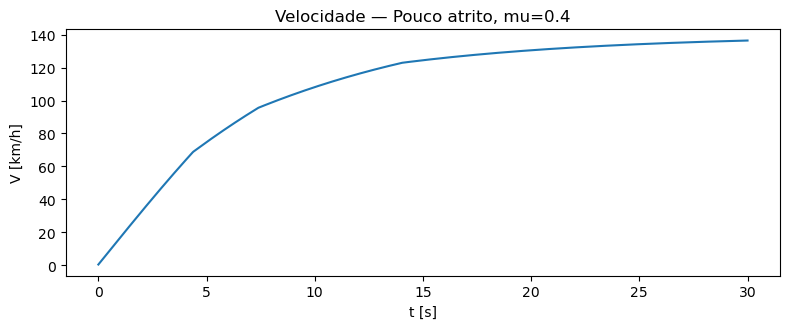

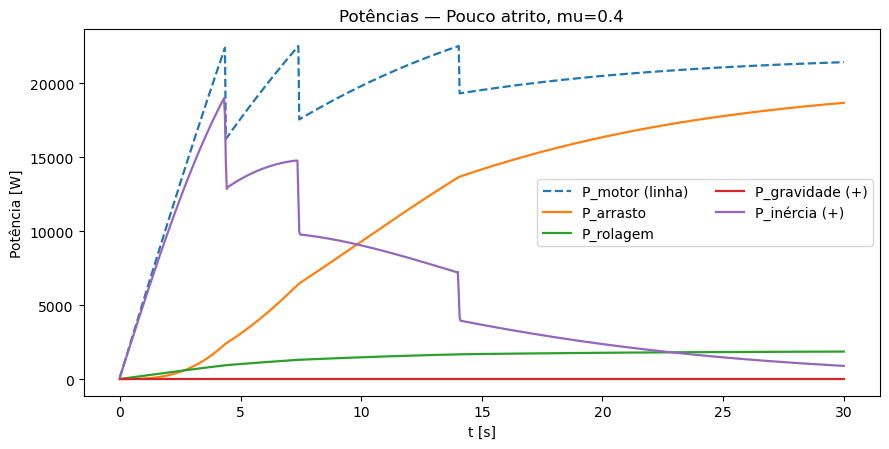

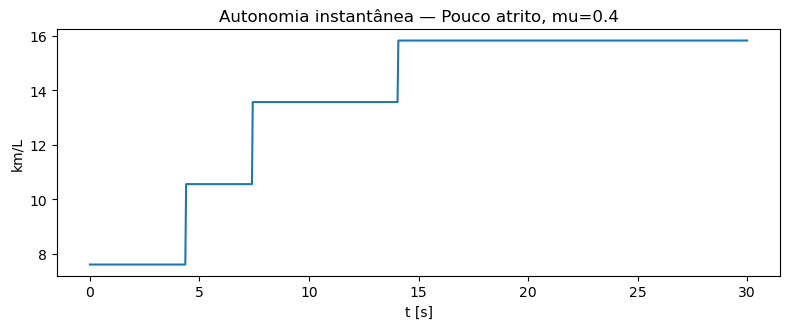

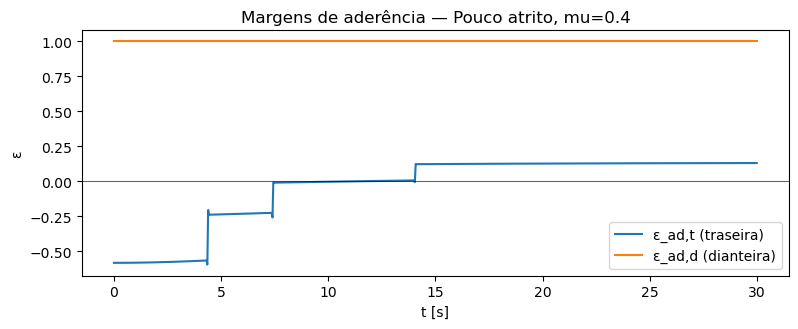

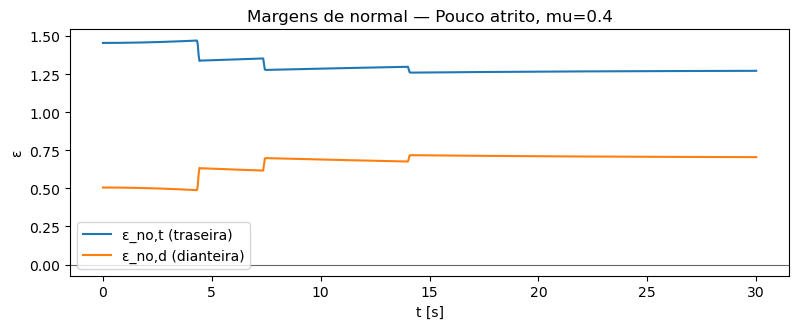

In [38]:
run_once('Pouco atrito, mu=0.4', mu=0.4);

## Comparação rápida com o caso base (mu=0.8 → agora mu=0.4)

Cenário: sem frenagem, sem demanda lateral relevante, mesmas marchas e parâmetros aerodinâmicos.

1) Velocidade V(t)
- Praticamente idêntica ao caso base. O termo de tração não é limitado por mu na EDO; logo V(t) não se altera diretamente.

2) Normais N_rt, N_rd
- Iguais ao caso base, pois dependem de m, a, geometria, aerodinâmica e rampa, não de mu.

3) Margens de aderência
- Traseira: queda significativa de $\varepsilon_{ad,t}$, podendo tocar 0 ou ficar negativa nos instantes iniciais (pico de $F_{\text{prop}}$). Como $F_{\text{disp},t}=\mu N_{rt}$ e $\mu$ foi reduzido à metade, a capacidade disponível cai e a margem encurta.
- Dianteira: $\varepsilon_{ad,d}$ permanece alta, pois não há tração nem frenagem dianteira no caso analisado.
- Interpretação: o modelo sinaliza risco de saturação longitudinal traseira no arranque; a dinâmica não corta a força, mas o diagnóstico indica que haveria patinagem se o limite fosse imposto.

4) Potências instantâneas
- Curvas $P_{\text{motor}}$, $P_{\text{aer}}$, $P_{\text{rol}}$, $P_{\text{grav}}$, $P_{\text{iner}}^{+}$ praticamente iguais ao caso base, já que não dependem de mu.

5) Consumo instantâneo
- Trajeto temporal semelhante ao caso base. Sem limitar a tração na EDO, o consumo segue as mesmas tendências de aceleração decrescente e arrasto crescente.

Conclusão prática: reduzir mu para 0.4 não altera V(t), normais, potências nem consumo neste modelo, mas reduz a folga de aderência na roda traseira, destacando possível saturação na fase de maior aceleração. Para refletir o efeito de mu na dinâmica, seria necessário impor $F_{\text{prop}} \le \mu N_{rt}$ (ou uma lei de saturação) na própria EDO.



---

### 🔹 Cenário: **Mais alta, h_CG=1.2**


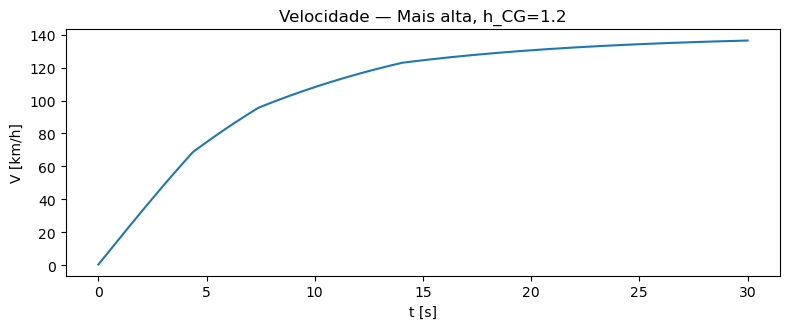

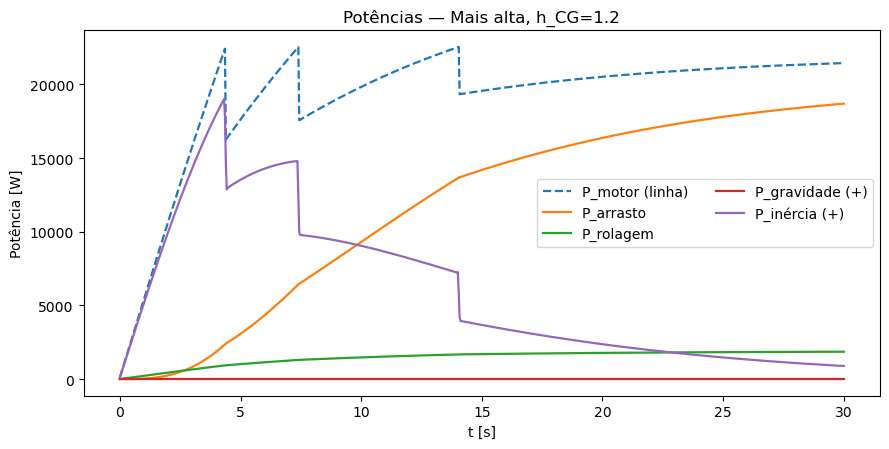

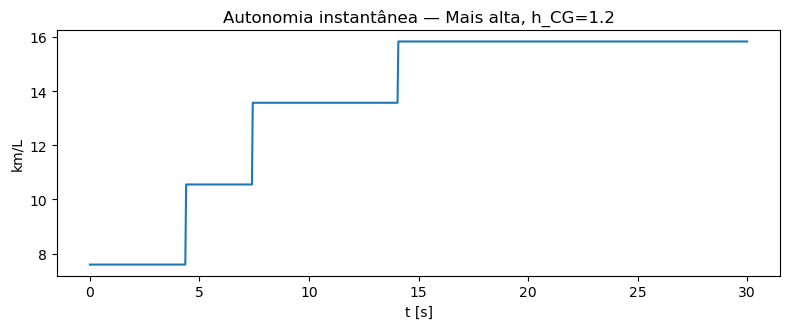

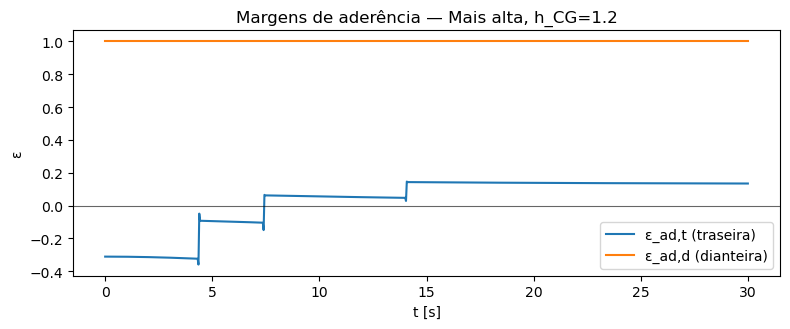

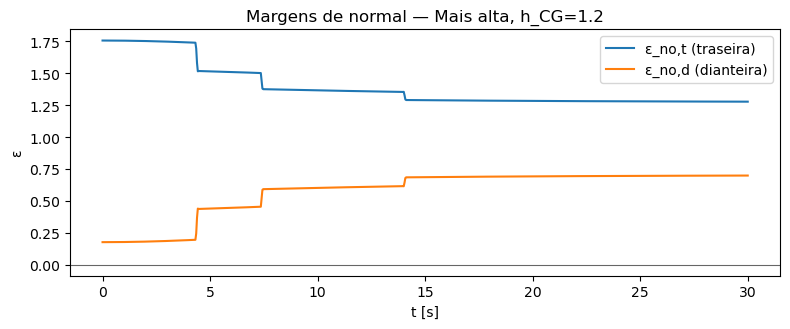

In [39]:
run_once('Mais alta, h_CG=1.2', h_CG=1.2);

## Comparação rápida com o caso base (h_CG=0.72 → agora h_CG=1.2)

Cenário: sem frenagem, mesma geometria longitudinal exceto h_CG, rampa nula e mesma estratégia de marchas.

1) Velocidade V(t)
- Praticamente idêntica ao caso base. Na EDO usada, com θ=0, h_CG não altera diretamente dV/dt; a seleção de marchas e as resistências permanecem iguais.

2) Normais N_rt, N_rd
- Maior transferência de carga em aceleração: o termo inercial m·a·h_CG/p_d cresce, elevando picos de N_rt e reduzindo N_rd nos transientes.
- Em cruzeiro (a ≈ 0), as normais convergem para os valores estáticos, como no caso base.

3) Margens de normal
- ε_no,t aumenta nos picos de aceleração (traseira mais carregada).
- ε_no,d diminui nos picos de aceleração (dianteira mais aliviada). Risco ligeiramente maior de front light em transientes intensos.

4) Margens de aderência
- Traseira: ε_ad,t tende a melhorar nos instantes de maior propulsão porque a capacidade disponível μ·N_rt aumenta com o novo h_CG.
- Dianteira: permanece alta neste cenário sem frenagem; seria penalizada em casos de frenagem forte, pois a transferência iria para a frente.

5) Potências instantâneas
- Curvas P_motor, P_aer, P_rol, P_grav e P_iner⁺ praticamente iguais ao caso base. As diferenças de h_CG afetam sobretudo a distribuição de normal, não as potências requeridas no regime analisado.

6) Consumo instantâneo
- Trajeto temporal semelhante ao caso base, pois V(t) e as potências resistivas são praticamente as mesmas.

Conclusão prática: elevar h_CG intensifica a transferência de carga nos transientes. Isso aumenta a folga de aderência na traseira durante aceleração e reduz na dianteira, sem alterar sensivelmente V(t), potências ou consumo neste cenário específico.



---

### 🔹 Cenário: **Moto mais leve, m=150**


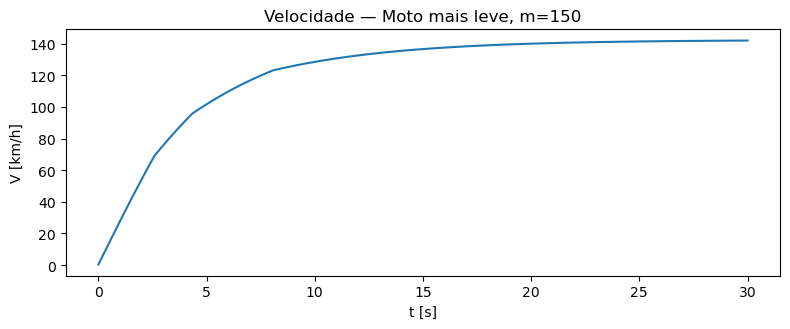

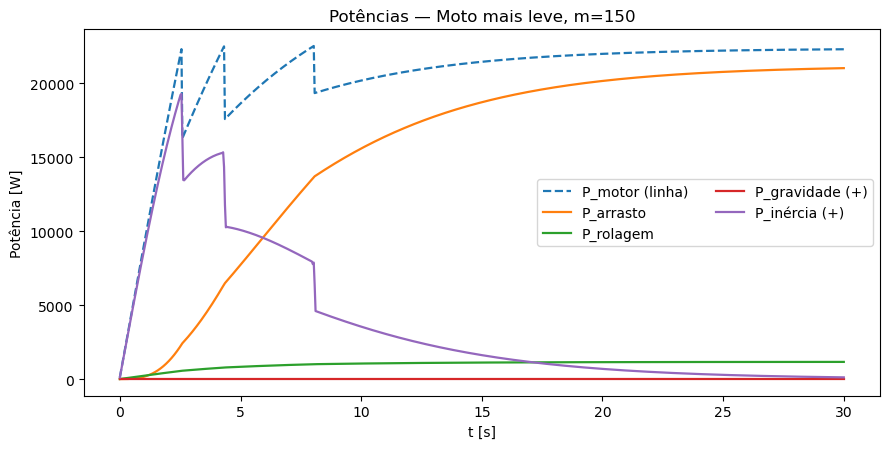

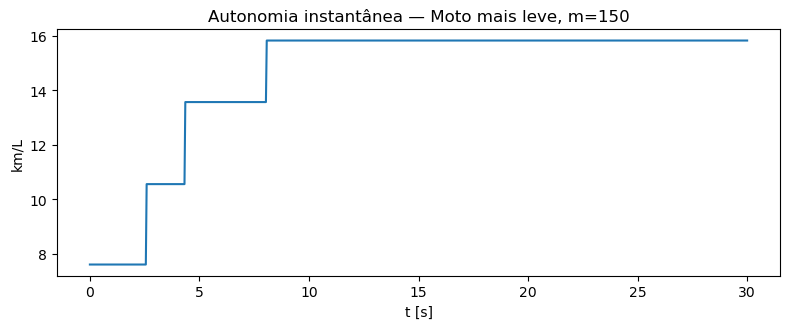

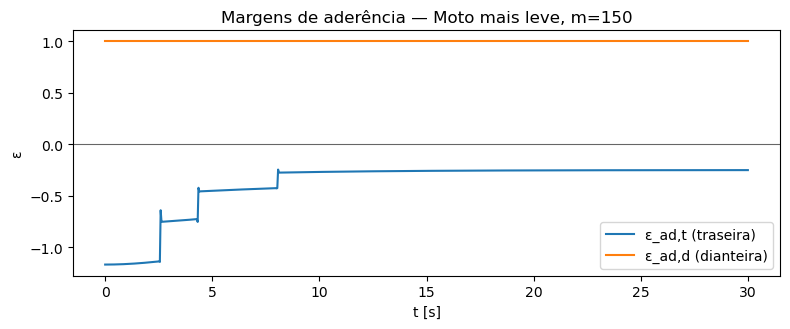

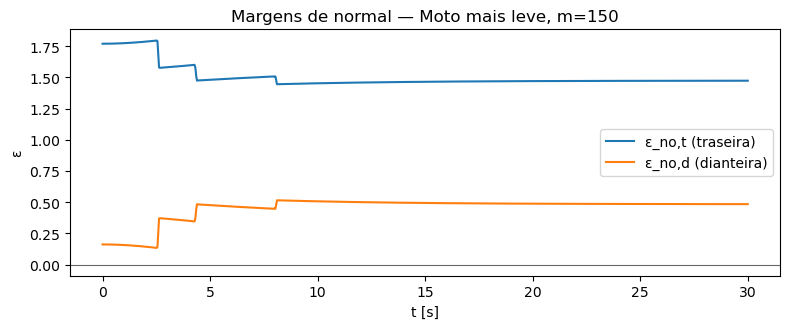

In [40]:
run_once('Moto mais leve, m=150', m=150);

## Comparação rápida com o caso base (m=250 → agora m=150)

Cenário: mesmas relações de marcha, aerodinâmica e pista horizontal; sem frenagem ativa.

1) Velocidade V(t)
- Sobe mais rápido do que no caso base. Como a EDO usa dV/dt = (F_prop − F_aer − F_rol − F_grav)/m, reduzir m aumenta a aceleração. Além disso, F_rol = C_R m g diminui com m, elevando o saldo de força e acelerando ainda mais o crescimento de V.

2) Normais N_rt, N_rd
- Os níveis absolutos de normal caem porque mg diminui. O termo inercial m a h_CG/p_d tende a crescer no início (F_net maior com F_rol menor), transferindo um pouco mais de carga para a traseira nos transientes. Em regime quase estacionário (a ≈ 0), as normais convergem para valores estáticos proporcionais ao novo m.

3) Margens de normal
- Em termos relativos (ε_no), o comportamento é semelhante ao caso base, pois N e N_est escalam com m. Diferenças aparecem apenas nos transientes devido ao termo inercial mais destacado.

4) Margens de aderência
- Traseira: duas influências concorrentes. A capacidade μ N_rt diminui com m (tende a piorar a margem), mas a transferência inercial maior na aceleração inicial eleva N_rt (tende a melhorar). Na prática, a margem no arranque pode ficar próxima da do caso base ou ligeiramente pior/melhor conforme os parâmetros; vale checar se toca ε_ad,t ≈ 0 nos primeiros instantes.
- Dianteira: segue aliviada nos transientes de aceleração e retorna ao patamar estático em a → 0.

5) Potências instantâneas
- P_rol cai proporcionalmente ao novo m. P_aer e P_grav não mudam com m (θ=0). P_iner = m V a pode ficar semelhante ou um pouco maior nos instantes iniciais porque V F_net aumenta com a redução de F_rol; depois declina conforme a diminuição de a.

6) Consumo instantâneo
- No código atual, C_inst(t) depende de V(t) e de P_motor via seletor de marcha. Como V cresce mais rápido, os patamares de C_inst surgem mais cedo no tempo; em termos qualitativos, a forma da curva é parecida com a do caso base, mas temporalmente “adiantada”.

Conclusão prática: a moto mais leve acelera sensivelmente mais rápido e sofre menos perdas por rolagem, antecipando os regimes de cruzeiro. Distribuições de normal e margens mudam sobretudo nos transientes; em regime, as diferenças se reduzem.



---

### 🔹 Cenário: **Melhor aerodinâmica, C_D=0.4**


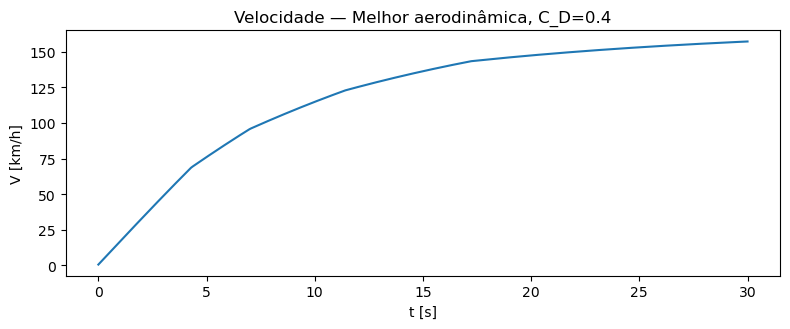

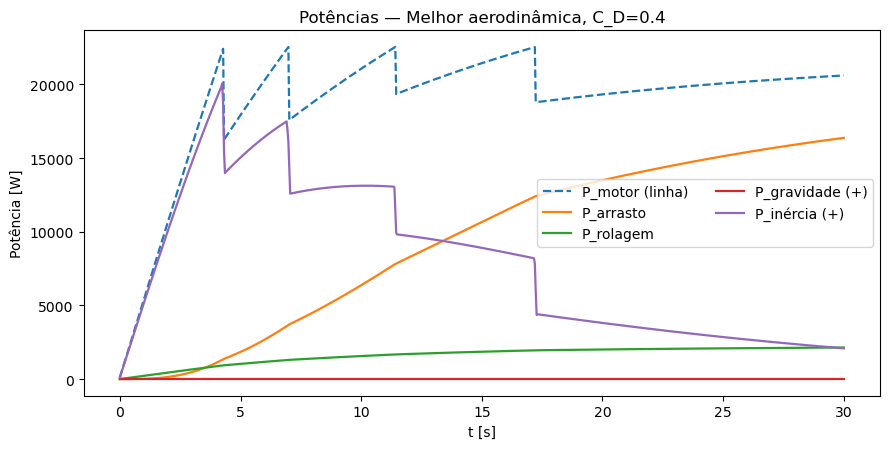

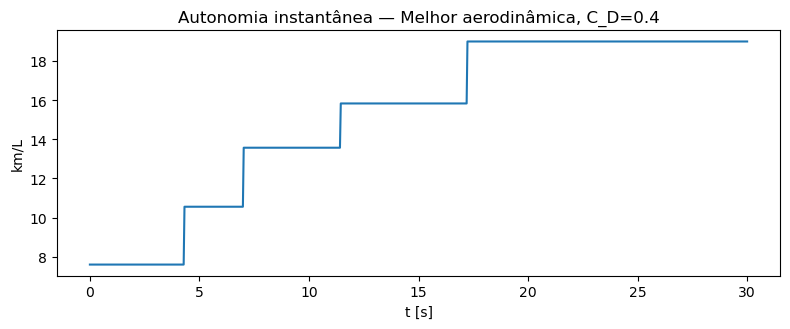

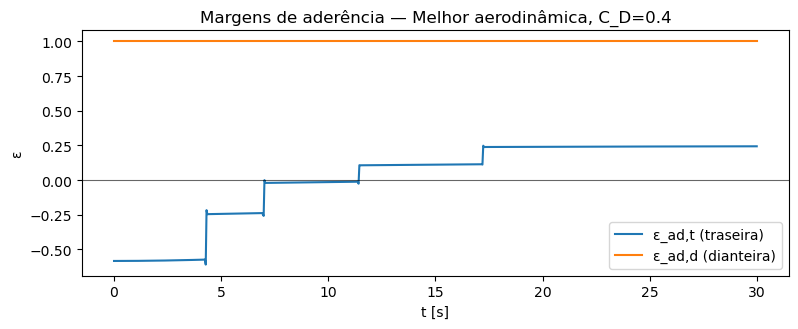

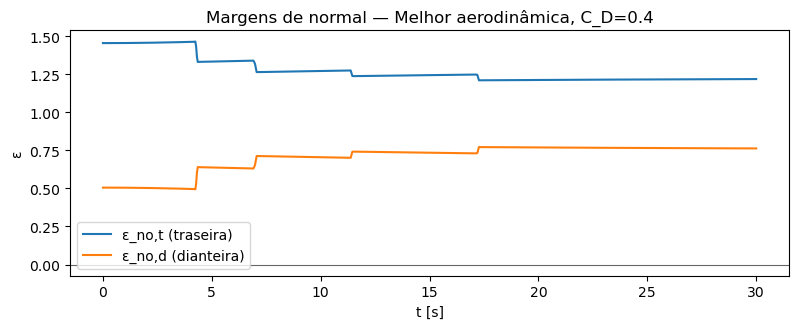

In [41]:
run_once('Melhor aerodinâmica, C_D=0.4', C_D=0.4);         # w_redline é recalculado

## Comparação rápida com o caso base (C_D=0.7 → agora C_D=0.4)

Cenário: mesmas marchas, mesma pista, sem frenagem ativa.

1) Velocidade V(t)
- Cresce de forma parecida no início; a diferença aparece conforme V sobe: com arrasto menor, a aceleração cai mais devagar.
- Velocidade de cruzeiro/assíntota é maior, pois o equilíbrio P_motor ≈ perdas ocorre em V mais alto (P_aer ∝ C_D (V−W)^3).

2) Normais N_rt, N_rd
- O termo aerodinâmico de transferência (∝ k_A (V−W)^2 h_CP, com k_A = ½ρ C_D A_f) fica menor.
- Resultado a altas velocidades: N_rt um pouco menor e N_rd um pouco maior do que no caso base, deixando a distribuição mais equilibrada.

3) Margens de aderência
- Traseira: duas tendências se contrapõem. A capacidade μ N_rt cai ligeiramente (menos transferência para trás), mas a demanda longitudinal também cai porque o arrasto é menor. Em geral a margem não piora e pode até melhorar no regime médio/alto.
- Dianteira: ligeiro aumento de N_rd melhora a margem, embora a demanda longitudinal dianteira seja nula neste caso.

4) Potências instantâneas
- P_aer cai significativamente em todo o intervalo (escala com C_D); P_rol e P_grav inalteradas; P_iner semelhante no começo e um pouco menor no meio-alto (menos potência drenada pelo arrasto).
- P_motor exigida para sustentar velocidades médias/altas é menor; o ponto onde P_aer domina se desloca para V mais alto.

5) Consumo instantâneo
- Para a mesma velocidade, o consumo em km/L é melhor do que no caso base (menor potência requerida).
- Ao longo do tempo, a curva atinge patamares mais altos e se estende a velocidades finais maiores.

Conclusão: reduzir C_D diminui o arrasto em todo o perfil, empurra a assíntota de velocidade para cima, reequilibra ligeiramente as normais e melhora o consumo para a mesma V. As maiores diferenças aparecem no regime médio/alto de velocidades, onde o arrasto domina.



---

### 🔹 Cenário: **Curva, R_curva=100**


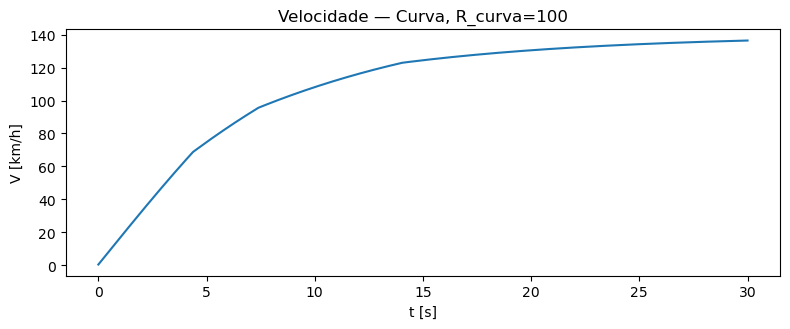

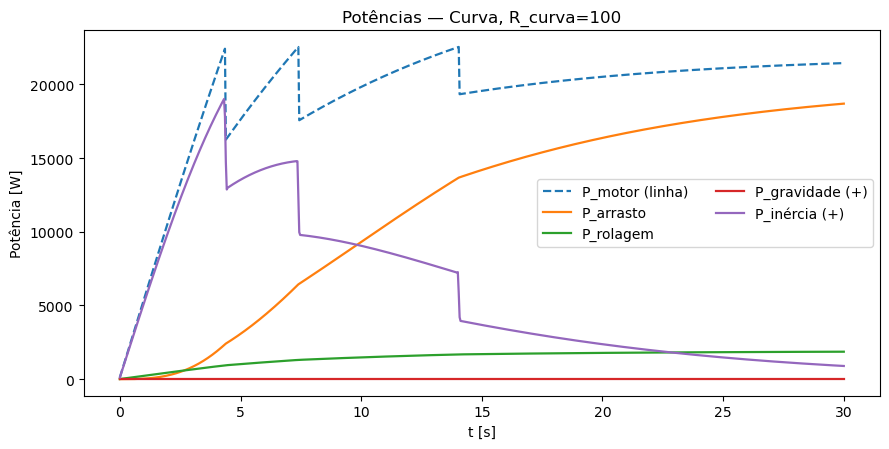

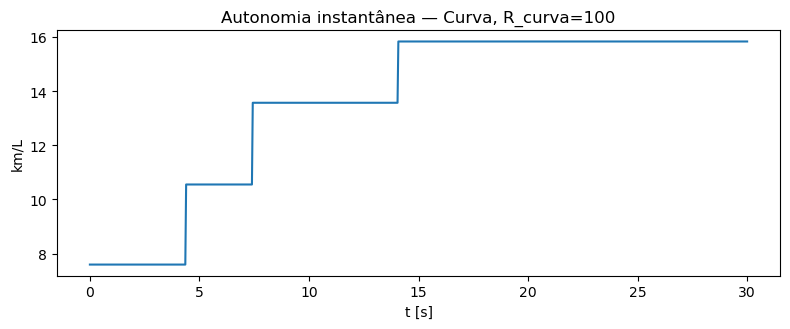

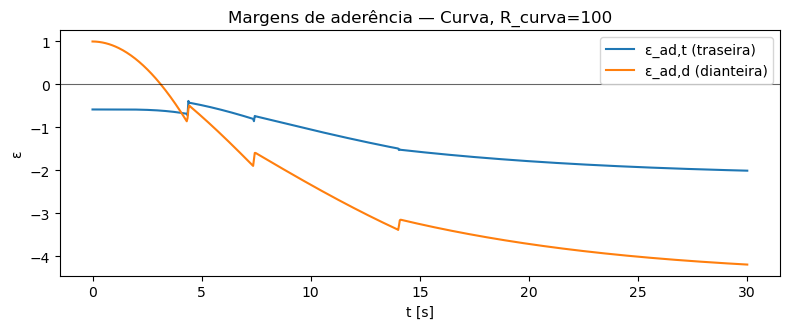

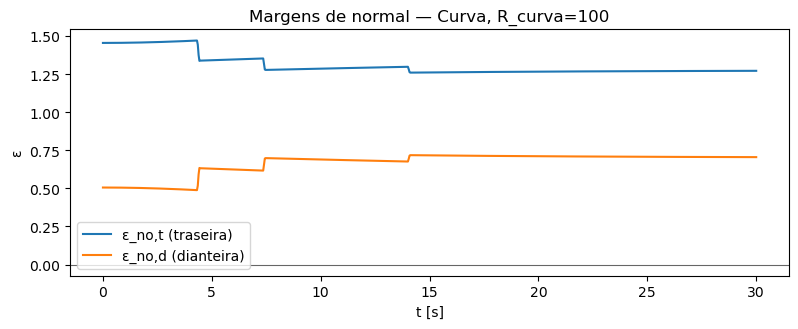

In [42]:
run_once('Curva, R_curva=100', R_curva=100);


---

### 🔹 Cenário: **Frenagem**


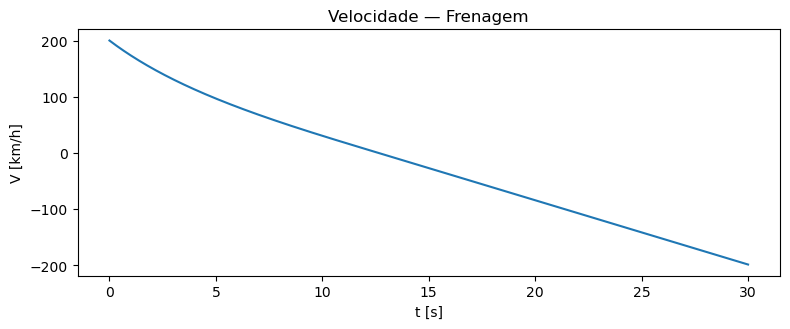

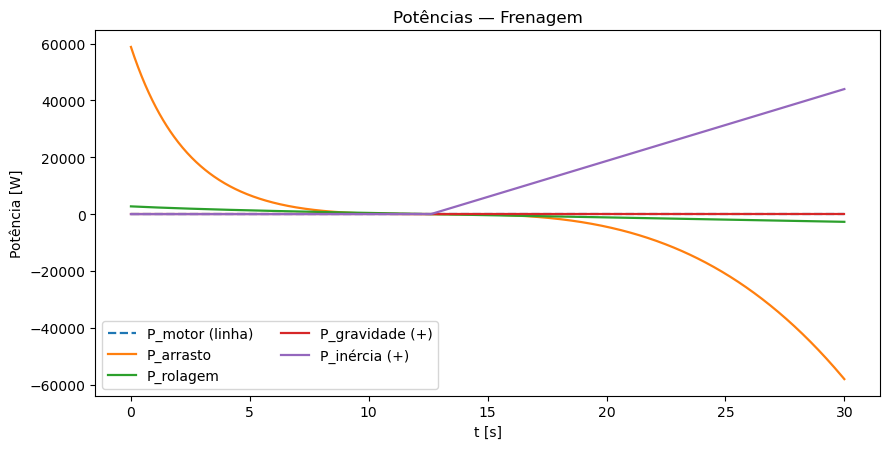

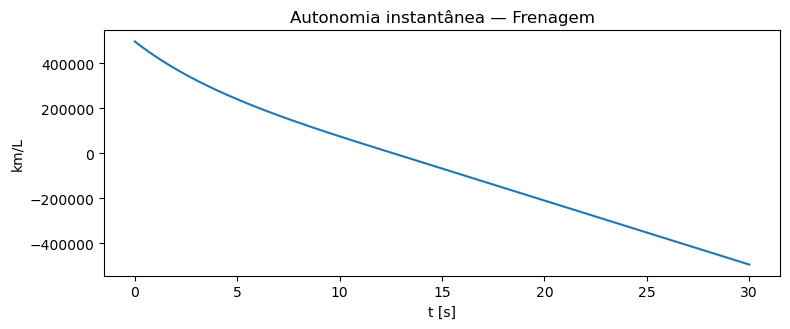

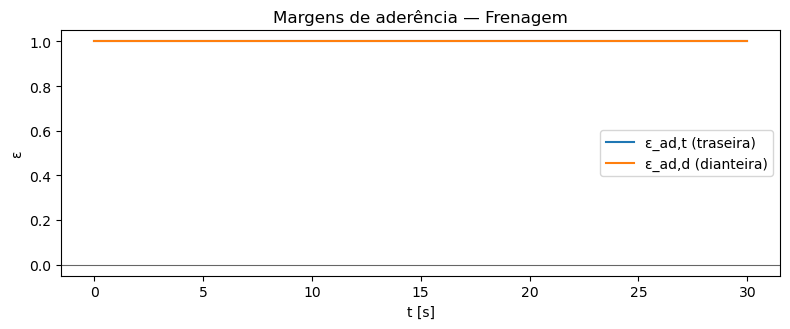

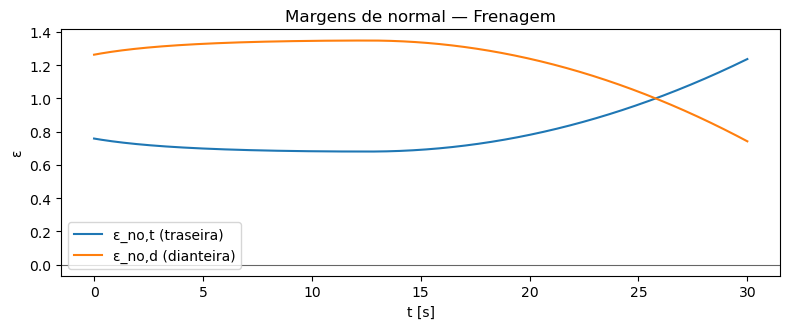

In [43]:
run_once('Frenagem', alpha=0, beta_t=1, beta_d = 0.5, V0 = 200/3.6, t_f=5);

## Comparação rápida com o caso base (R_curva → 100 m)

Cenário: mesma geometria, massa, atrito e propulsão, mas agora a motocicleta percorre uma curva de raio constante de 100 m.

1) Velocidade V(t)
- Aceleração inicial semelhante ao caso base, pois as forças longitudinais seguem o mesmo balanço.  
- No entanto, a componente centrípeta mV²/R_curva aumenta com V, introduzindo demanda lateral que limita a aderência disponível para tração.  
- Assim, a curva de V(t) tende a crescer mais lentamente nos trechos de alta velocidade, podendo saturar antes do ponto do caso base.

2) Normais N_rt, N_rd
- Valores médios próximos aos do caso plano, mas a presença de força centrípeta provoca leves assimetrias devido à inclinação virtual (efeito de “rolagem” lateral).  
- No modelo planar, o efeito aparece apenas nas margens de aderência, não nas normais propriamente ditas.

3) Margens de aderência
- Dianteira: passa a ter demanda lateral F_cen_d ≈ mV²/R_curva·(p_CG/p_d); isso consome parte da capacidade μN_rd mesmo sem tração longitudinal.  
- Traseira: a resultante total cresce devido à combinação vetorial de F_prop (longitudinal) e F_cen_t (lateral).  
- Ambas as margens ε_ad,d e ε_ad,t diminuem, especialmente em velocidades maiores. É o primeiro caso em que aparecem sinais claros de saturação combinada (F_long² + F_lat² ≈ (μN)²).

4) Margens de normal
- Praticamente inalteradas: a normal total depende de forças verticais e da transferência longitudinal, não do raio da curva (no modelo sem efeito de rolagem do chassi).

5) Potências
- P_motor, P_aer, P_rol e P_grav não mudam diretamente com R_curva, mas parte da energia fornecida pelo motor agora é consumida em força lateral (curva → atrito transversal).  
- O resultado é uma ligeira queda na potência efetiva disponível para aceleração longitudinal.

6) Consumo instantâneo
- Em baixas velocidades, quase igual ao caso base.  
- Em velocidades médias/altas, o consumo em km/L tende a piorar, pois o motor mantém potência elevada enquanto a velocidade estabiliza em regime limitado por aderência.

Conclusão: introduzir uma curva de raio 100 m reduz a margem de aderência em ambas as rodas e limita o ganho de velocidade, simulando um regime em que parte da capacidade de atrito é desviada para a força centrípeta. O comportamento longitudinal e energético se degrada moderadamente em comparação com o caso base retilíneo.


## Trabalhos futuros

- Variar a eficiência volumétrica e a eficiência da propulsão em função da rotação e da carga.
- Verificar o modelo com os dados/resultados de uma motocicleta real